In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import re

In [2]:
# Import dataset from: https://www.kaggle.com/teajay/global-shark-attacks/version/1
dataset = pd.read_csv("asset-v1_IRONHACK+DAFT+201909_SAO+type@asset+block@attacks.csv",encoding="latin-1")

In [3]:
# Verify dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
Case Number               8702 non-null object
Date                      6302 non-null object
Year                      6300 non-null float64
Type                      6298 non-null object
Country                   6252 non-null object
Area                      5847 non-null object
Location                  5762 non-null object
Activity                  5758 non-null object
Name                      6092 non-null object
Sex                       5737 non-null object
Age                       3471 non-null object
Injury                    6274 non-null object
Fatal (Y/N)               5763 non-null object
Time                      2948 non-null object
Species                   3464 non-null object
Investigator or Source    6285 non-null object
pdf                       6302 non-null object
href formula              6301 non-null object
href                      6302 non-null obje

In [4]:
# View dataset
dataset.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [5]:
# Using a mask to see the data in the 'Unnamed: 22' column
dataset[dataset["Unnamed: 22"].notnull()]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
1478,2006.05.27,27-May-2006,2006.0,Unprovoked,USA,Hawaii,"North Shore, O'ahu",Surfing,Bret Desmond,M,...,NaN,R. Collier,2006.05.27-Desmond.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2006.05.27,2006.05.27,4825.0,stopped here,NaN


In [6]:
dataset[dataset["Unnamed: 22"].notnull()].shape[0]

1

In [7]:
# Sames as above but with 'Unnamed: 23' column
dataset[dataset["Unnamed: 23"].notnull()]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
4415,1952.03.30,30-Mar-1952,1952.0,Unprovoked,NETHERLANDS ANTILLES,Curacao,NaN,Went to aid of child being menaced by the shark,A.J. Eggink,M,...,"Bull shark, 2.7 m [9'] was captured & dragged ...","J. Randall, p.352 in Sharks & Survival; H.D. B...",1952.03.30-Eggink.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1952.03.30,1952.03.30,1888.0,NaN,Teramo
5840,1878.09.14.R,Reported 14-Sep-1878,1878.0,Provoked,USA,Connecticut,"Branford, New Haven County",Fishing,Captain Pattison,M,...,NaN,"St. Joseph Herald, 9/14/1878",1878.09.14.R-Pattison.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1878.09.14.R,1878.09.14.R,463.0,NaN,change filename


In [8]:
dataset[dataset["Unnamed: 23"].notnull()].shape[0]

2

In [9]:
# Dropping the column "Unnamed: 22" and "Unnamed: 23" because there is no useful information in them
dataset = dataset.drop(['Unnamed: 22', 'Unnamed: 23'], axis=1)

In [10]:
dataset.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0


In [11]:
# Duplicateds rows
dataset[dataset.duplicated()]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
6310,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6311,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6312,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6313,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6314,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Removing duplicateds rows
dataset.drop_duplicates(inplace=True)

In [13]:
# Now removing where 'Case Number' == 0 --> There is no consistent data here
dataset[dataset["Case Number"] == '0']

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
6302,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6304.0
6303,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6305.0
6304,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6306.0
6305,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6307.0
6306,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6308.0
6307,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6309.0
6308,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6310.0
6309,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Getting index from 'Cases Number' == 0 and dropping from dataframe
case_series = dataset.index[6302:].tolist() # Making a list of index 
dataset.drop(index=case_series, inplace=True)

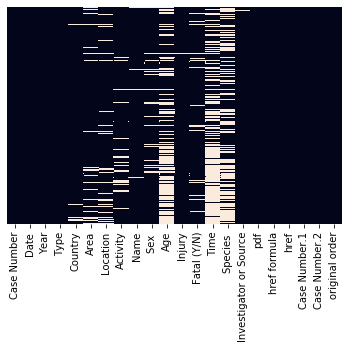

In [15]:
sns.heatmap(dataset.isnull(), cbar=False, yticklabels=False);

In [16]:
# Here I see the result of the columns. If there is disagreement between them I will see the result
dataset[~(dataset['Case Number.1'] == dataset['Case Number.2'])].shape[0]

20

In [17]:
# checking typos 'Case Number' == 'Case Number.1'
dataset[~(dataset['Case Number'] == dataset['Case Number.1'])].head().shape[0]

5

From the above results I conclude that those columns have same values but with typos.

In [18]:
dataset.drop(labels=["Case Number.1","Case Number.2"], inplace=True, axis=1)

In [19]:
# Total of rows with typos
dataset[~(dataset['href formula'] == dataset['href'])].shape[0]

60

In [20]:
# Total rows of datase
dataset.shape[0]

6302

In [21]:
# The difference between the column values is approximately 1%, using this data as a basis to remove one of the columns.
dataset.drop(labels=["href formula"], inplace=True, axis=1)

In [22]:
# Checking column entries
dataset['Sex '].unique()

array(['F', 'M', nan, 'M ', 'lli', 'N', '.'], dtype=object)

In [23]:
# Replace the entries for generic nan and 'M'
dataset['Sex '].replace({'lli' : 'M', 'N' : 'M', 'M ': 'M', '.' : 'undefined', np.nan : 'undefined'}, inplace=True)
dataset['Sex '].unique()

array(['F', 'M', 'undefined'], dtype=object)

In [24]:
# 'Case Number' and 'Original Order' seem to mean the same, so I chose it as my key in the dataset.
#  For rearrange first I get of the columns
dataset.drop(labels=["Case Number"], inplace=True, axis=1)

In [25]:
# And I put 'astype' = int to make a index integer
dataset['original order'] = dataset['original order'].astype('int64')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6302 entries, 0 to 6301
Data columns (total 18 columns):
Date                      6302 non-null object
Year                      6300 non-null float64
Type                      6298 non-null object
Country                   6252 non-null object
Area                      5847 non-null object
Location                  5762 non-null object
Activity                  5758 non-null object
Name                      6092 non-null object
Sex                       6302 non-null object
Age                       3471 non-null object
Injury                    6274 non-null object
Fatal (Y/N)               5763 non-null object
Time                      2948 non-null object
Species                   3464 non-null object
Investigator or Source    6285 non-null object
pdf                       6302 non-null object
href                      6302 non-null object
original order            6302 non-null int64
dtypes: float64(1), int64(1), object(16)
memory

In [26]:
# Exploring  column 'Year' there is two missing values
# Getting nan index
dataset[dataset["Year"].isna()]

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href,original order
187,Reported 08-Jan-2017,NaN,Invalid,AUSTRALIA,Queensland,NaN,Spearfishing,Kerry Daniel,M,35,"No attack, shark made a threat display",NaN,NaN,Bull shark,Liquid Vision 1/8/2017,2017.01.08.R-KerryDaniel.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6116
6079,Reported 19-Aug-1836,NaN,Unprovoked,ENGLAND,Cumberland,Whitehaven,Swimming,a boy,M,NaN,FATAL,Y,NaN,NaN,"C. Moore, GSAF",1835.08.19.R-Whitehaven.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,224


In [27]:
# Putting the values of Years in the index of 'nan'
dataset["Year"].loc[187] = 2017
dataset["Year"].loc[6079] = 1836
print( dataset["Year"].loc[187])
print( dataset["Year"].loc[6079])

2017.0
1836.0


C:\Users\nilso\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [28]:
# Setting year to an integer
dataset['Year'] = dataset['Year'].astype('Int64')

In [29]:
# Exploring 'Fatal (Y/N)'
dataset['Fatal (Y/N)'].unique()

array(['N', 'Y', nan, 'M', 'UNKNOWN', '2017', ' N', 'N ', 'y'],
      dtype=object)

In [30]:
dataset['Fatal (Y/N)'].replace({'M': 'N', 'UNKNOWN' : np.nan, '2017' : np.nan,' N' : 'N', 'N ': 'N', 'y' : 'Y'}, inplace=True)

In [31]:
dataset['Fatal (Y/N)'].unique()

array(['N', 'Y', nan], dtype=object)

In [32]:
# In the name column there are 'm', I checked that it could be related to the person's gender so 
# I changed the 'Sex' column to 'M'
dataset.loc[dataset['Name'] == 'male', 'Sex '] = 'M'

In [33]:
# Same for female
dataset.loc[dataset['Name'] == 'female', 'Sex '] = 'F'

In [34]:
# This time I gonna work in 'Species ' column
# Replace NaN with string to not crash program
dataset['Species '].replace(np.nan,"undefined", inplace=True)

# And lower case the column for tratament
dataset['Species '] = dataset['Species '].apply(lambda string: string.lower())
dataset['Species '].describe()

count          6302
unique         1536
top       undefined
freq           2838
Name: Species , dtype: object

In [35]:
# .nunique() returns the number of occurrences of uniques
dataset['Country'].nunique()

212

In [36]:
dataset["Country"].describe()

count     6252
unique     212
top        USA
freq      2229
Name: Country, dtype: object

In [37]:
# .str.strip() --> remove spaces before and after the string -- Using in 'Country' column
dataset["Country"] = dataset["Country"].str.strip()

In [38]:
dataset["Country"].nunique()

204

In [39]:
dataset["Country"].describe()

count     6252
unique     204
top        USA
freq      2229
Name: Country, dtype: object

In [40]:
# Replace NaN with string - 'undefined'
dataset['Country'].replace(np.nan,"undefined", inplace=True)

In [41]:
# Values of column 'Time'
dataset['Time'].unique()

array(['18h00', '14h00  -15h00', '07h45', nan, 'Late afternoon', '17h00',
       '14h00', 'Morning', '15h00', '08h15', '11h00', '10h30', '10h40',
       '16h50', '07h00', '09h30', 'Afternoon', '21h50', '09h40', '08h00',
       '17h35', '15h30', '07h30', '19h00, Dusk', 'Night', '16h00',
       '15h01', '12h00', '13h45', '23h30', '09h00', '14h30', '18h30',
       '12h30', '16h30', '18h45', '06h00', '10h00', '10h44', '13h19',
       'Midday', '13h30', '10h45', '11h20', '11h45', '19h30', '08h30',
       '15h45', 'Shortly before 12h00', '17h34', '17h10', '11h15',
       '08h50', '17h45', '13h00', '10h20', '13h20', '02h00', '09h50',
       '11h30', '17h30', '9h00', '10h43', 'After noon', '15h15', '15h40',
       '19h05', '1300', '14h30 / 15h30', '22h00', '16h20', '14h34',
       '15h25', '14h55', '17h46', 'Morning ', '15h49', '19h00',
       'Midnight', '09h30 / 10h00', '10h15', '18h15', '04h00', '14h50',
       '13h50', '19h20', '10h25', '10h45-11h15', '16h45', '15h52',
       '06h15', '14h

In [42]:
# In this case, I just use a simple function to clean up as much as possible. --> 'Time' column
def day_period(x):
    try:
        x = int(re.search(r'\d\d', x).group())
        
        if x >= 0 and x < 6:
            return 'Dawn'        
        elif x >= 6 and x < 12:
            return 'Morning' 
        elif x >= 12 and x < 18:
            return 'Afternoon' 
        else:
            return 'Night'
        
    except:        
        return x

In [43]:
dataset['Time'].replace(np.nan,'undefined', inplace=True)
dataset['Period'] = dataset['Time'].apply(lambda x: day_period(x))
dataset['Period'].unique()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6302 entries, 0 to 6301
Data columns (total 19 columns):
Date                      6302 non-null object
Year                      6302 non-null Int64
Type                      6298 non-null object
Country                   6302 non-null object
Area                      5847 non-null object
Location                  5762 non-null object
Activity                  5758 non-null object
Name                      6092 non-null object
Sex                       6302 non-null object
Age                       3471 non-null object
Injury                    6274 non-null object
Fatal (Y/N)               5691 non-null object
Time                      6302 non-null object
Species                   6302 non-null object
Investigator or Source    6285 non-null object
pdf                       6302 non-null object
href                      6302 non-null object
original order            6302 non-null int64
Period                    6302 non-null object
dt

In [44]:
dataset['Age'].replace(np.nan,"undefined",inplace=True)

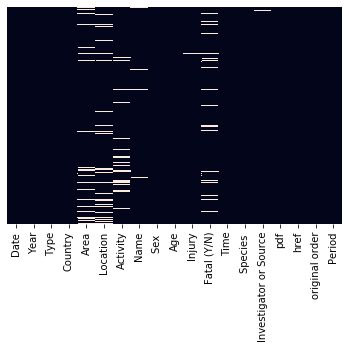

In [45]:
dataset['Age'].unique()
sns.heatmap(dataset.isnull(), cbar=False, yticklabels=False);

In [46]:
dataset['Age'].unique()

array(['57', '11', '48', 'undefined', '18', '52', '15', '12', '32', '10',
       '21', '34', '30', '60', '33', '29', '54', '41', '37', '56', '19',
       '25', '69', '38', '55', '35', '46', '45', '14', '40s', '28', '20',
       '24', '26', '49', '22', '7', '31', '17', '40', '13', '42', '3',
       '8', '50', '16', '82', '73', '20s', '68', '51', '39', '58', 'Teen',
       '47', '61', '65', '36', '66', '43', '60s', '9', '72', '59', '6',
       '27', '64', '23', '71', '44', '62', '63', '70', '18 months', '53',
       '30s', '50s', 'teen', '77', '74', '28 & 26', '5', '86', '18 or 20',
       '12 or 13', '46 & 34', '28, 23 & 30', 'Teens', '36 & 26',
       '8 or 10', '84', '\xa0 ', ' ', '30 or 36', '6½', '21 & ?', '75',
       '33 or 37', 'mid-30s', '23 & 20', ' 30', '7      &    31', ' 28',
       '20?', "60's", '32 & 30', '16 to 18', '87', '67', 'Elderly',
       'mid-20s', 'Ca. 33', '74 ', '45 ', '21 or 26', '20 ', '>50',
       '18 to 22', 'adult', '9 & 12', '? & 19', '9 months', '25 to

In [47]:
# Function to adjust age
def age_adjust(x):
    
    x = x.lower()
    
    if  x == 'teen':
        x = "16"
        return x
    
    elif x == '18 months':
        x = "1"
        return x
    
    elif x == '18 or 20':
        x = "19"
        return x
    
    elif x == '8 or 10':
        
        x = "9"
        return x
    
    elif x == '\xa0 ':
        x = 'undefined'
        return x
    
    elif x == ' ':
        x = 'undefined'
        return x
    
    elif x == '6½':
        x = 'undefined'
        return x
    
    elif x == '21 & ?':
        x = '21'
        return x
    
    elif x == '33 or 37':
        x = '35'
        return x
    
    elif x == 'mid-30s':
        x = '35'
        return x
    
    elif x == '20?':
        x = '20'
        return x
    
    elif x == 'Elderly':
        x = '70'
        return x
    
    elif x == 'mid-20s':
        x = '25'
        return x
    
    elif x == 'Ca. 33':
        x = '33'
        return 'x'
    
    elif x == '21 or 26':
        x = '24'
        return x
    
    elif x == '>50':
        x = '51'
        return x
    
    elif x == '18 to 22':
        x = '20'
        return x
    
    elif x == 'adult' or x == '(adult)':
        x = '45'
        return x
    
    elif x == '25 or 28':
        x = '27'
        return x
    
    elif x == '37, 67, 35, 27,  ? & 27':
        x = '48'
        return x
    
    elif x == '21, 34,24 & 35':
        x = '29'
        return x
    
    elif x == '30 & 32':
        x = '31'
        return x
    
    elif x == '50 & 30':
        x = '40'
        return x
    
    elif x == '17 & 35':
        x = '26'
        return x
    
    elif x == 'X':
        x =  'undefined'
        return x
    
    elif x == '"middle-age"':
        x = '55'
        return x
    
    elif x == '13 or 18':
        x = '16'
        return x
    
    elif x == '34 & 19':
        x = '27'
        return x
    
    elif x == '33 & 26':
        x = '30'
        return x
    
    elif x == '2 to 3 months':
        x = '0'
        return x
    
    elif x == 'MAKE LINE GREEN':
        x = 'undefined'
        return x
    
    elif x == '"young"' or x == 'young':
        x = '18'
        return x
    
    elif x == ' 43':
        x = '43'
        return x
    
    elif x == '7 or 8':
        x = '8'
        return x
    
    elif x == '17 & 16':
        x = '17'
        return x
    
    elif x == 'F':
        x = 'undefined'
        return x
    
    elif x == 'Both 11':
        x = '11'
        return x
    
    elif x == '9 or 10':
        x = '10'
        return x
    
    elif x == '36 & 23':
        x = '31'
        return x
    
    elif x == '  ':
        x = 'undefined'
        return x
    
    elif x == 'A.M.':
        x = 'undefined'
        return x
    
    elif x == '?    &   14':
        x = 'undefined'
        return x
    
    elif x == '10 or 12':
        x = '11'
        return x
    
    elif x == '31 or 33':
        x = '32'
        return x
    
    elif x == '31 or 33':
        x = '32'
        return x
    
    elif x == '2½':
        x = '2'
        return x
    
    elif x == '13 or 14':
        x = '14'
        return x
    else:
        return x

In [48]:
dataset['Age'] = dataset['Age'].apply(lambda x: age_adjust(x))

In [49]:
dataset.to_csv('C:\\Users\\nilso\\Documents\\git-ws\\data-projects\\PROJECT 02 - Data Cleaning\\csv\\clean.csv')

In [56]:
# Final format
#  pd.options.display.max_rows = 300 --> changes max rows visualization
dataset.head(300)[0:10]

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href,original order,Period
0,25-Jun-2018,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,white shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6303,Night
1,18-Jun-2018,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,undefined,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6302,Afternoon
2,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,undefined,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6301,Morning
3,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,undefined,Minor injury to lower leg,N,undefined,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6300,undefined
4,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,undefined,Lacerations to leg & hand shark PROVOKED INCIDENT,N,undefined,"tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6299,undefined
5,03-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris,M,undefined,"No injury, board bitten",N,undefined,undefined,"Daily Telegraph, 6/4/2018",2018.06.03.b-FlatRock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6298,undefined
6,03-Jun-2018,2018,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,18,FATAL,Y,Late afternoon,tiger shark,"Diario de Pernambuco, 6/4/2018",2018.06.03.a-daSilva.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6297,Late afternoon
7,27-May-2018,2018,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,male,M,52,Minor injury to foot. PROVOKED INCIDENT,N,undefined,"lemon shark, 3'","K. McMurray, TrackingSharks.com",2018.05.27-Ponce.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6296,undefined
8,26-May-2018,2018,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,Cody High,M,15,Lower left leg bitten,N,17h00,"bull shark, 6'","K.McMurray, TrackingSharks.com",2018.05.26.b-High.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6295,Afternoon
9,26-May-2018,2018,Unprovoked,USA,Florida,"Daytona Beach, Volusia County",Standing,male,M,12,Minor injury to foot,N,14h00,undefined,"K. McMurray, Tracking Sharks.com",2018.05.26.a-DaytonaBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6294,Afternoon


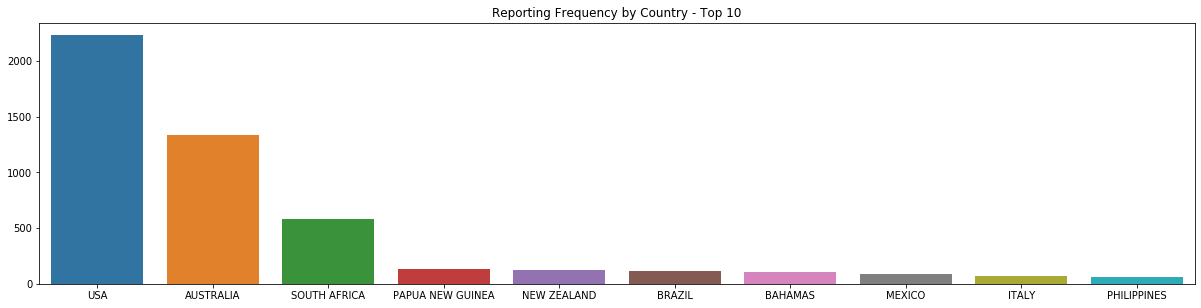

In [65]:
country_graph = pd.Series.sort_values(dataset['Country'].value_counts(), ascending=False)

fig, ax = plt.subplots()
fig.set_size_inches(20.7, 4.8)
plt.title('Reporting Frequency by Country - Top 10') 
sns.barplot(x=country_graph[:10].keys(), y=country_graph[:10].values);

In [71]:
# country_graph = pd.Series.sort_values(dataset['Country'].value_counts(), ascending=False)


# fig, ax = plt.subplots()
# fig.set_size_inches(20.7, 4.8)
# plt.title('Reporting Frequency by Country - Top 10') 
# sns.barplot(x=country_graph[:10].keys(), y=country_graph[:10].values);

usa = dataset[dataset['Country'] == 'USA']
fatal =  pd.Series.sort_values(usa['Fatal (Y/N)'].value_counts(), ascending=False)

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href,original order,Period
0,25-Jun-2018,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,white shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6303,Night
1,18-Jun-2018,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,undefined,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6302,Afternoon
2,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,undefined,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6301,Morning
7,27-May-2018,2018,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,male,M,52,Minor injury to foot. PROVOKED INCIDENT,N,undefined,"lemon shark, 3'","K. McMurray, TrackingSharks.com",2018.05.27-Ponce.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6296,undefined
8,26-May-2018,2018,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,Cody High,M,15,Lower left leg bitten,N,17h00,"bull shark, 6'","K.McMurray, TrackingSharks.com",2018.05.26.b-High.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6295,Afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6249,Before 1958,0,Unprovoked,USA,Florida,"Palm Beach, Palm Beach County",Standing,Horton Chase,M,undefined,Abrasions & bruises hip to ankle,N,undefined,undefined,"V.M. Coppleson (1956), p.255; R.F. Hutton",ND-0056-HortonChase.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,54,undefined
6283,Before 1921,0,Unprovoked,USA,Florida,"Gadsden Point, Tampa Bay",Fishing,James Kelley,M,undefined,2-inch lacerations,N,undefined,undefined,"T. Helm, p.219",ND-0019-Kelley.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,20,undefined
6288,Before 17-Jul-1916,0,Unprovoked,USA,North Carolina,Somewhere between Hatteras and Beaufort,Swimming,"""youthful male""",M,undefined,"""Lost leg""",N,undefined,undefined,"C. Creswell, GSAF; Wilmington Star, 7/17/1916",ND-0014-pre1916-NorthCarolina.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,15,undefined
6292,Circa 1862,0,Unprovoked,USA,Hawaii,Puna,NaN,"A ""chiefess""",F,undefined,Ankle bitten,N,undefined,undefined,Captain W. Young,ND-0010-Puna Hawaii.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,11,undefined
